# Построение гистограммы распределения

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Импорт данных из текста

Текст с данными каждого тестирования баланса внимания доступен для копирования при нажатии кнопки "Экспортировать данные", расположенной в конце страницы с результатами. Комбинации клавиш для копирования: `Ctrl-A` (выделить все) и `Ctrl-C` (копировать).


Создадим переменную с текстом. Краткое название `s` означает "string, строка". Поскольку этот текст занимает много строк, то мы ограничиваем его тройными кавычками.

In [2]:
s='''lps=[
11.516,0.365;
18.657,0.319;
26.752,0.313;
33.457,0.415;
40.614,0.379;
49.785,0.439;
58.077,0.436;
66.954,0.43;
73.462,0.411;
77.899,0.318;
81.582,0.331;
85.394,0.278;
89.357,0.259;
94.11,0.291;
98.307,0.333;
102.495,0.354;
107.003,0.373;
108.639,0.314;
110.709,0.308;
112.328,0.305;
114.396,0.309;
116.433,0.311;
118.837,0.323;
120.655,0.337;
131.162,0.47;
140.221,0.331;
147.681,0.312;
157.215,0.321;
164.737,0.416;
171.2,0.544;
178.674,0.287;
185.737,0.703;
192.244,0.372;
195.493,0.539;
199.887,0.29;
204.577,0.239;
209.183,0.289;
213.338,0.447;
216.879,0.45;
220.159,0.353;
224.665,0.399;
226.277,0.339;
228.446,0.282;
230.339,0.302;
232.707,0.31;
234.945,0.296;
236.729,0.287;
238.924,0.276]'''
len(s)

702

Длина текста - 702 символа.
Мы видим, что одни символы означают нужные нам числа, а другие - разделители между числами. Для извлечения чисел мы можем использовать методы поиска подстроки для очистки текста от ненужных символов, а для конвертации в числовой массив - специальные команды для создания массивов.

In [3]:
#найдем квадратные скобки, ограничивающие данные
iab=s.find('[')
iad=s.find(']')
s=s[iab:iad+1]  #оставляем только то, что между скобками
if len(s)>10:  #если между скобками что-то есть
    a=array(mat(s.replace('\n','')))  #создаем массив (array) 
else:    #иначе заведем пустой массив (на случай неверных исходных данных)
    a=array([])
a.shape

(48, 2)

Форма полученного массива чисел - 48 на 2, то есть 48 строк и 2 колонки.

> Просмотрите содержимое переменной `a` (создайте ячейку, вставьте туда название переменной и выполните).

## Импорт данных с веб-странички

Когда Вы просматриваете страницу результатов теста в браузере, то видите результаты обработки данных в виде рисунков и прочего. Следовательно, в составе информации, которую получил браузер в ответ на запрос к серверу, присутствуют нужные нам данные. Надо лишь извлечь их!

Исходный код веб-страницы можно посмотреть, нажав `Ctrl-U` (или пункт меню "Посмотреть код страницы" или "Исходный код страницы").

Внутри одного из тегов `<script type="text/javascript">` (скрипте на языке JavaScript) задается переменная с данными, на основании которых строятся рисунки. Вы можете найти строку, начинающуюся на `lps=` (Для поиска на странице нажмите `Ctrl-F`) следующего формата:
    
    lps=[[9.585,0.429], [16.368,0.335], [23.729,0.357],  ...

Это как раз те данные, что нам нужны. 
Значение переменной представляет собой описание массива, состоящего из множества маленьких массивчиков, в каждом из которых по два значения.

Библиотека `urllib` позволяет работать с URL как с файлами, т.е. открыть их и прочитать содержимое.

In [4]:
import urllib

u = 'http://balatte.stireac.com/balatte/result/ntkharchenko%40mail.ru/up9.valeo.sfedu.ru__20111212T135308671'
s = urllib.request.urlopen(u).read()
print ('Скачано {} байт!'.format(len(s)))

Скачано 8563 байт!


Если Вы посмотрите содержимое переменной `s`, то увидите запутанный HTML код - тот же, что мы видели в браузере через пункт меню "Посмотреть исходный код".

Для нахождения нужного нам фрагмента по характерным символам в его начале и конце используем библиотеку `re` для работы с регулярными выражениями (regular expressions).

In [5]:
import re

s = str(s)   # преобразуем скачанные байты в строку
m = re.search(r'lps=(\[\[.+?\]\])',s)
a = array(eval(m.group(1)))
a.shape

(45, 2)

Функция `eval()` выполняет команды в передаваемом ей тексте, т.е. воспринимает текст как программный код. Безошибочность данной операции обеспечивается за счет сходства синтаксиса построения массивов в языках Python и JavaScript. 

---

Мы познакомились с несколькими вариантами извлечения данных из открытых ресурсов.

В случае с данными из теста на внимание в итоге мы получили двумерный массив чисел, первая колонка - время предъявления стимулов, с; вторая колонка - время реакции (латентный период), с.

## Гистограмма

Теперь, когда мы разобрались со структурой наших данных,
берем значения из второй колонки и строим гистограмму распределения с помощью функции `hist`.

Вторая колонка имеет индекс 1, поскольку индексация начинается с 0, и 0 - это первая по счёту колонка.

(array([ 9.,  6., 15.,  8.,  2.,  3.,  0.,  0.,  1.,  1.]),
 array([0.282 , 0.3236, 0.3652, 0.4068, 0.4484, 0.49  , 0.5316, 0.5732,
        0.6148, 0.6564, 0.698 ]),
 <BarContainer object of 10 artists>)

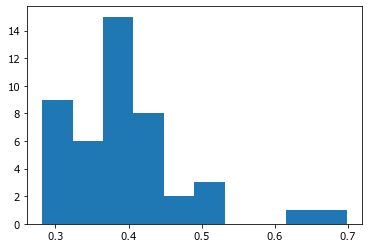

In [6]:
vv = a[:,1]
hist(vv)

По информации, возвращаемой функцией `hist`, ясно, что значения были разделены на 10 групп. Границы групп идут с равным шагом от 0.2 до 0.7, что видно по оси абсцисс.
По оси ординат отложено количество значений в каждой группе.

Чтобы не гадать, что за информация возращается функцией `hist`, обратимся к документации.

In [7]:
hist?

Signature:
hist(
    x,
    bins=None,
    range=None,
    density=False,
    weights=None,
    cumulative=False,
    bottom=None,
    histtype='bar',
    align='mid',
    orientation='vertical',
    rwidth=None,
    log=False,
    color=None,
    label=None,
    stacked=False,
    *,
    data=None,
    **kwargs,
)
Docstring:
Plot a histogram.

Compute and draw the histogram of *x*.  The return value is a tuple
(*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*, [*patches0*,
*patches1*, ...]) if the input contains multiple data.  See the
documentation of the *weights* parameter to draw a histogram of
already-binned data.

Multiple data can be provided via *x* as a list of datasets
of potentially different length ([*x0*, *x1*, ...]), or as
a 2-D ndarray in which each column is a dataset.  Note that
the ndarray form is transposed relative to the list form.

Masked arrays are not supported.

The *bins*, *range*, *weights*, and *density* parameters behave as in
`numpy.histogram`.

Para

Важный параметр - `bins` (корзинки, ячейки, ящички) - определенное число заданных интервалов, попадание в которые подсчитывается. Можно задать в штуках, а можно в виде перечня границ. Интервалы обычно делают одинаковой ширины, хотя это не обязательно.

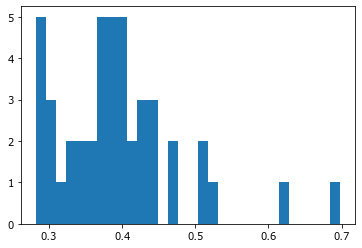

In [8]:
hist(vv, bins=30);

Количество/ширину интервалов обычно подбирают на глаз. Поскольку обычно стоит задача оценить форму распределения, то автоматические методы подбора "оптимального" количества классов опираются на характеристики распределения - *моменты распределения*:
1. Среднее (mean)
2. Дисперсия (variance, вариация)
3. Асимметричность (skewness, скошенность, неравенство хвостов)
4. Эксцесс (kurtosis, тяжесть хвостов)

In [9]:
from scipy.stats import kurtosis, skew

sturges = lambda data: int(log2(len(data)) + 1)
rice = lambda data: int(2*len(data)**0.333)
doane = lambda data: int(1 + log(len(data)) + log(1 + kurtosis(data) * (len(data) / 6.) ** 0.5))

vv = vv[~isnan(vv)] # удалим пропущенные значения
sturges(vv), rice(vv), doane(vv)

(6, 7, 6)

Ссылки на описания методов.

- Sturges, H.A. (1926). "The choice of a class interval". Journal of the American Statistical Association: 65–66. doi:10.1080/01621459.1926.10502161.

- Lane D.M. (2007) http://onlinestatbook.com/2/graphing_distributions/histograms.html

- Doane D.P. (1976) Aesthetic frequency classiﬁcation. American Statistician, 30: 181–183

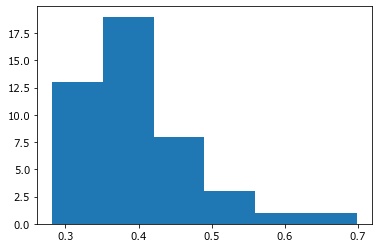

In [10]:
hist(vv, bins=6);

Другой полезный параметр - `density` (плотность), который позволяет нормировать высоту столбцов в процентах к общему числу данных.

В результате получается эмпирическая плотность вероятности, т.е. чем выше столбик в этом месте диапазона, тем больше вероятность, что значения попадают в данный интервал.

В этой же шкале мы можем наложить теоретическое нормальное распределение (и любое другое).

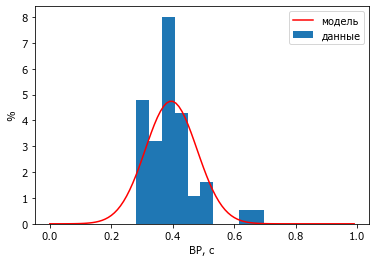

In [11]:
import scipy.stats as stats

hist(vv, density=True, label='данные')

#найдем характеристики распределения (предположительно нормального)
M = mean(vv); S = std(vv);
xx = arange(0, 1, 0.01) #подробные значения абсцисс для гладкой кривой
yy = stats.norm.pdf(xx, M, S)
plot(xx, yy, 'r-', label='модель'); legend(); xlabel('ВР, с'); ylabel('%');

При наложении графиков эмпирического и теоретического распределений видно, что 
распределение значений времени реакций несимметричное.